# Single Glacier Uncertainty Spreads

### This notebook is used to demonstrate how to generate individual plots for glacier volume uncertainty plots, given the netcdf model output.

#### Import necessary analysis packages

In [2]:
# analysis packages
import numpy as np
import pandas as pd
import xarray as xr

# file reading and manipulation
import copy
import glob
import os

# plotting packages
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style('grade3', fscale=1.3)
jtplot.figsize(x=18, y=10)

#### Import model output files

In [3]:
results = {}

filelist = glob.glob(os.path.join('../Output/old/' , 'PyGEM_R15_MPI-ESM-LR_rcp26*s_all.nc'))
for f in filelist:
    name = f[70:-26]
    results[name] = xr.open_dataset(f)
    
filelist2 = glob.glob(os.path.join('../Output/old/' , 'PyGEM_R15_MPI-ESM-LR_rcp26*2_all.nc'))
for f in filelist2:
    name = f[70:-31]
    results[name] = xr.open_dataset(f)
    
filelist3 = glob.glob(os.path.join('../Output/old/' , 'PyGEM_R15_MPI-ESM-LR_rcp85*.nc'))
for f in filelist3:
    name = f[70:-31]
    results[name] = xr.open_dataset(f)

### Plot Ensemble Spreads

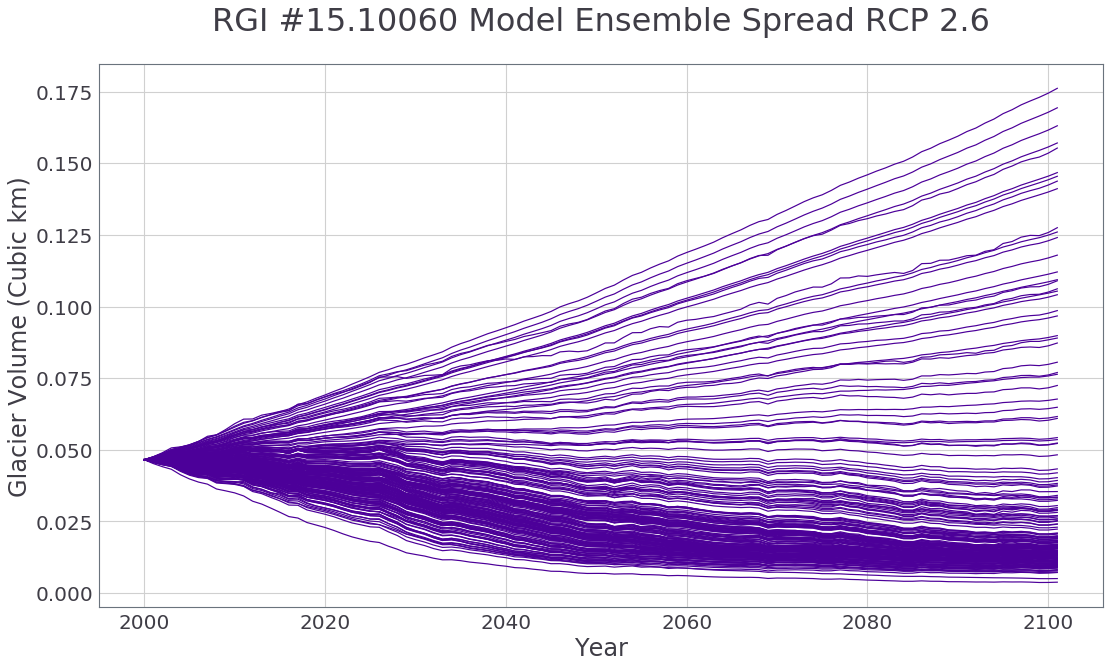

../uncertainty_plots_single_glacier/spread.png


In [4]:
fig = plt.figure()

for i in range(200):
    plt.plot(results['27_10000']['volume_glac_annual'].sel(glac_idx=3, sim=i).to_series(), color='#4C0099')
    
# niceties
plt.title('RGI #15.10060 Model Ensemble Spread RCP 2.6', fontsize = 32, y=1.05)
plt.ylabel('Glacier Volume (Cubic km)', fontsize =24)
plt.xlabel('Year', fontsize = 24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()
print('../uncertainty_plots_single_glacier/spread.png')

# fig.savefig('../uncertainty_plots_single_glacier/spread.png')

## Making it Pretty

#### We calculate standard deviation and mean for each ensemble (assuming normal distribution)

#### Then, we plot these areas using the matplotlib fill between function

#### Note: It these plots the shaded region represents one standard deviation from the mean. Uncertainty could be ploted in different ways, and with different numbers of stnadard deviations /confidence intervals.

#### Other note: this looks at 8 glaciers, under two different RCPs. Each glacier and RCP is plotting separately

#### Last note: There was some weird indexing issue in this output, so the second half of the glaciers are not labeled correctly.

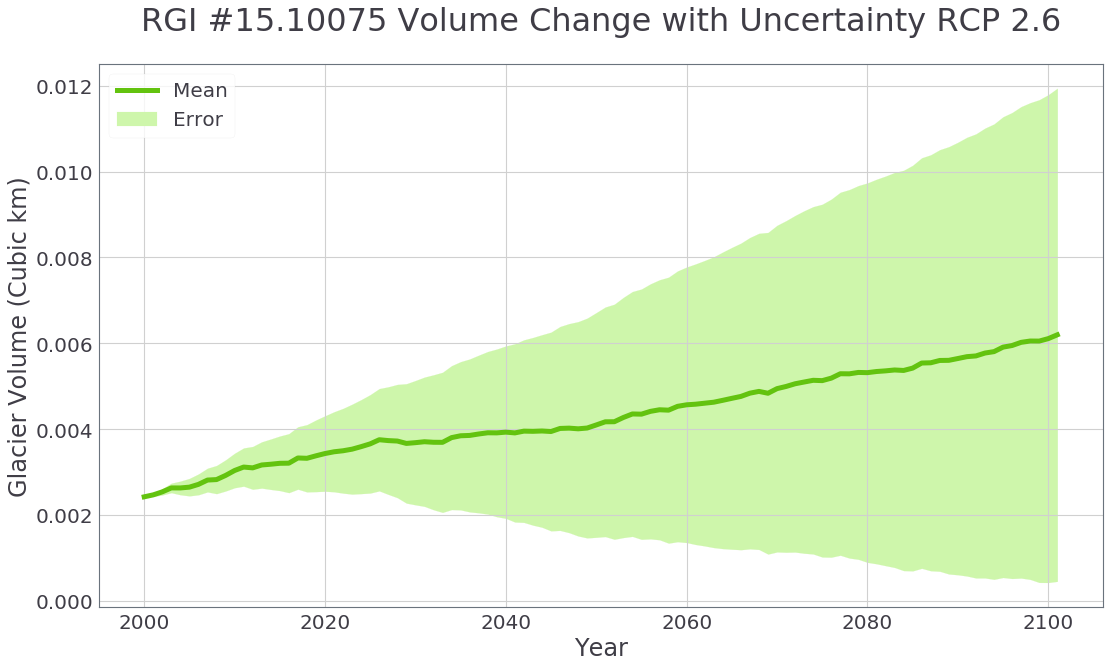

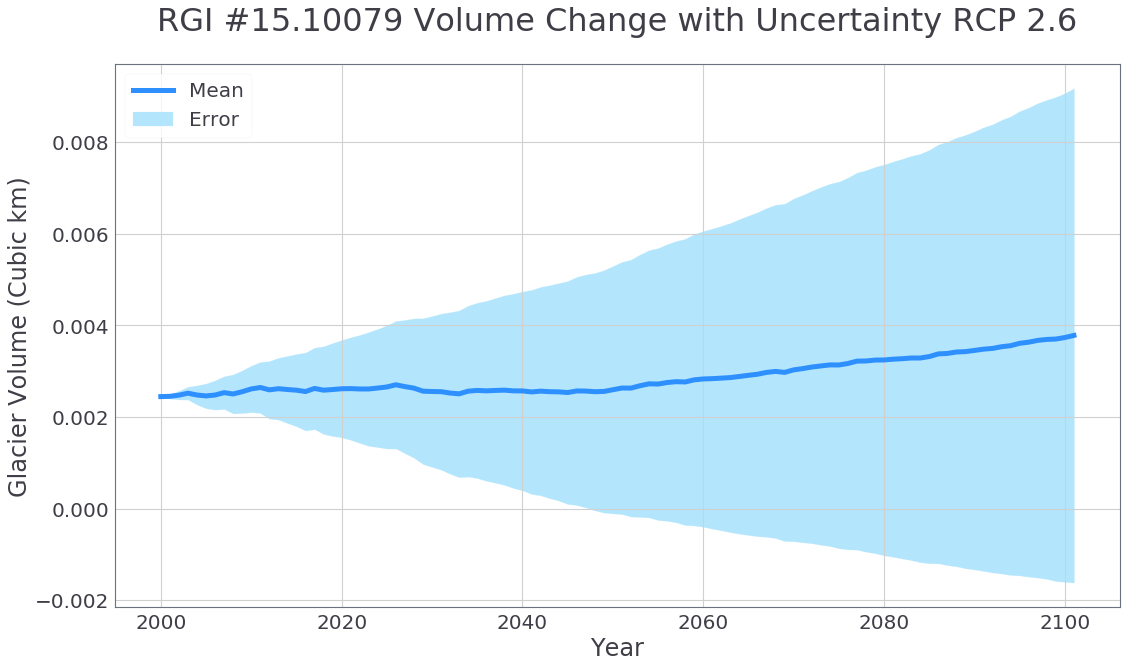

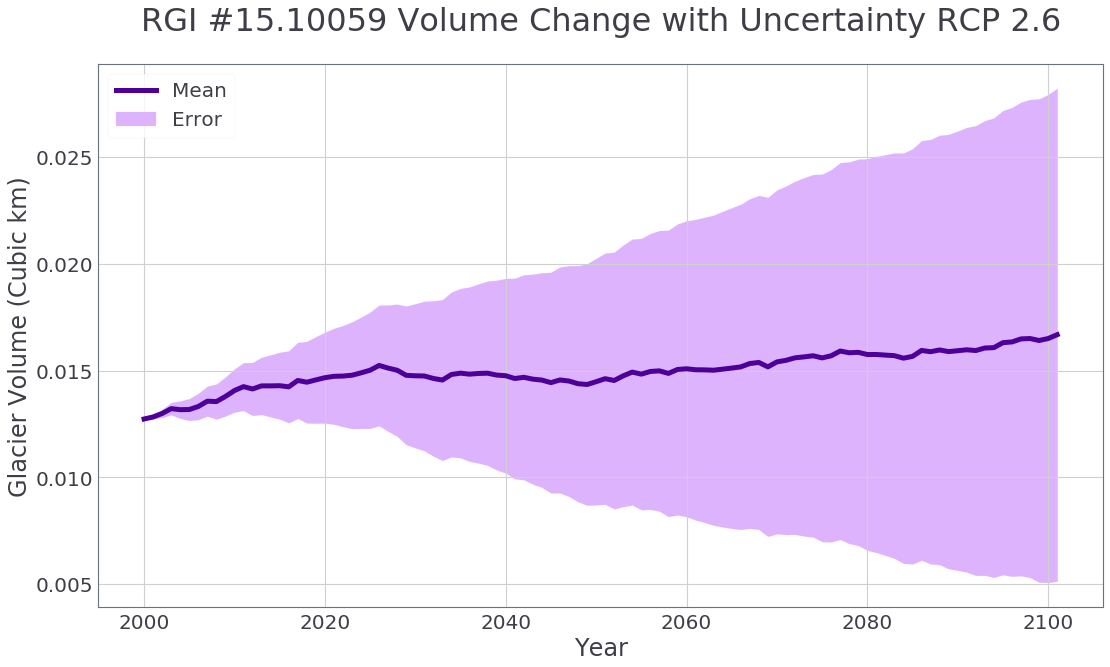

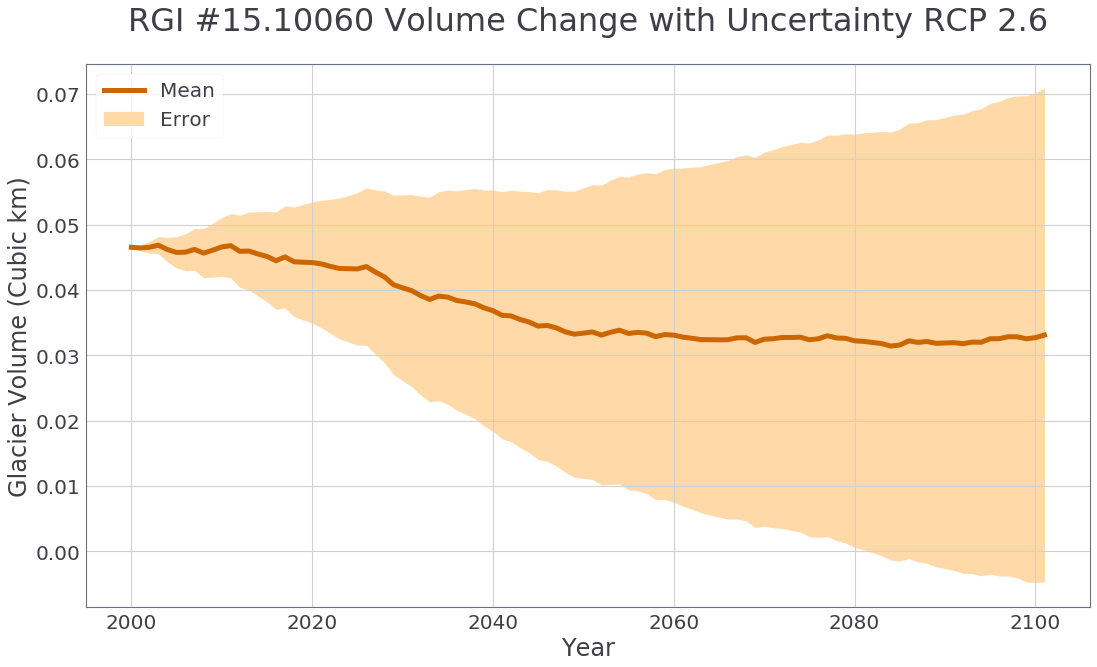

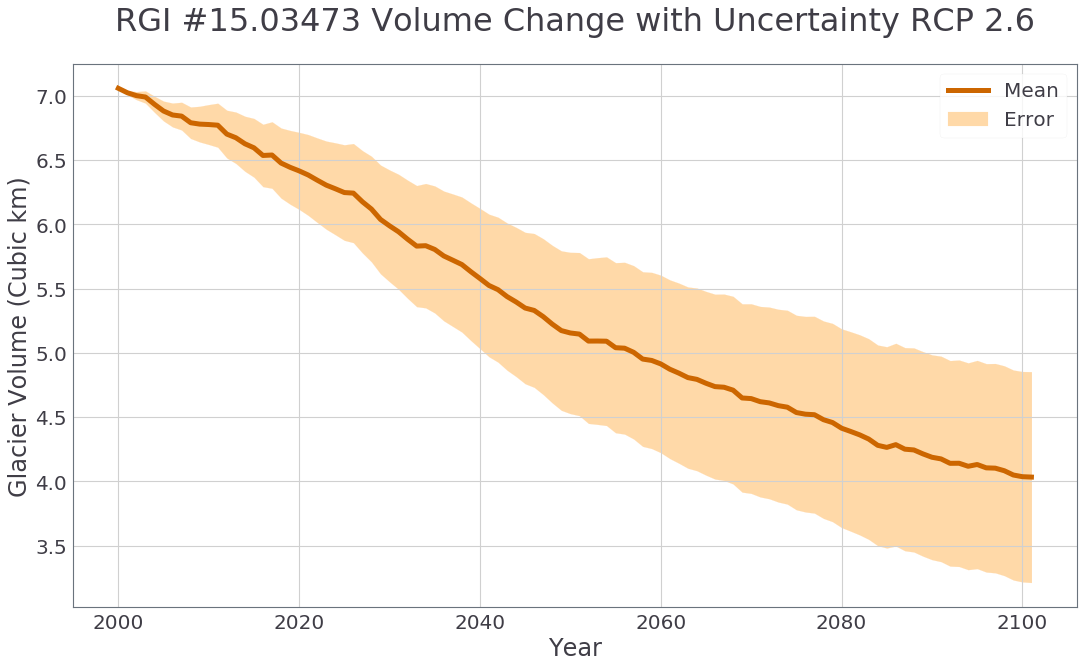

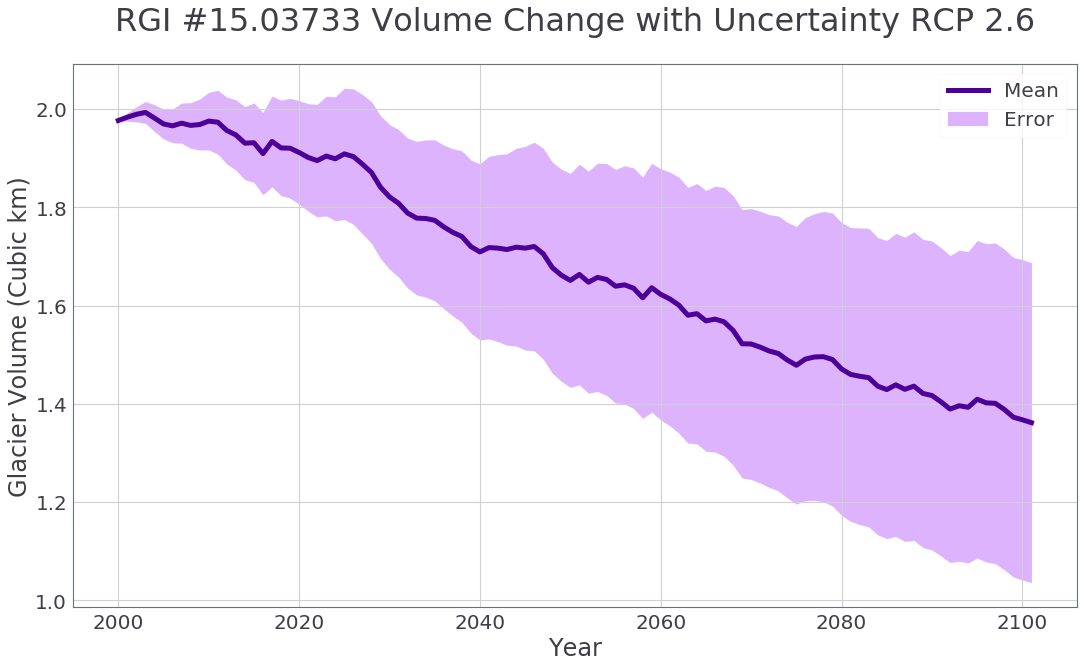

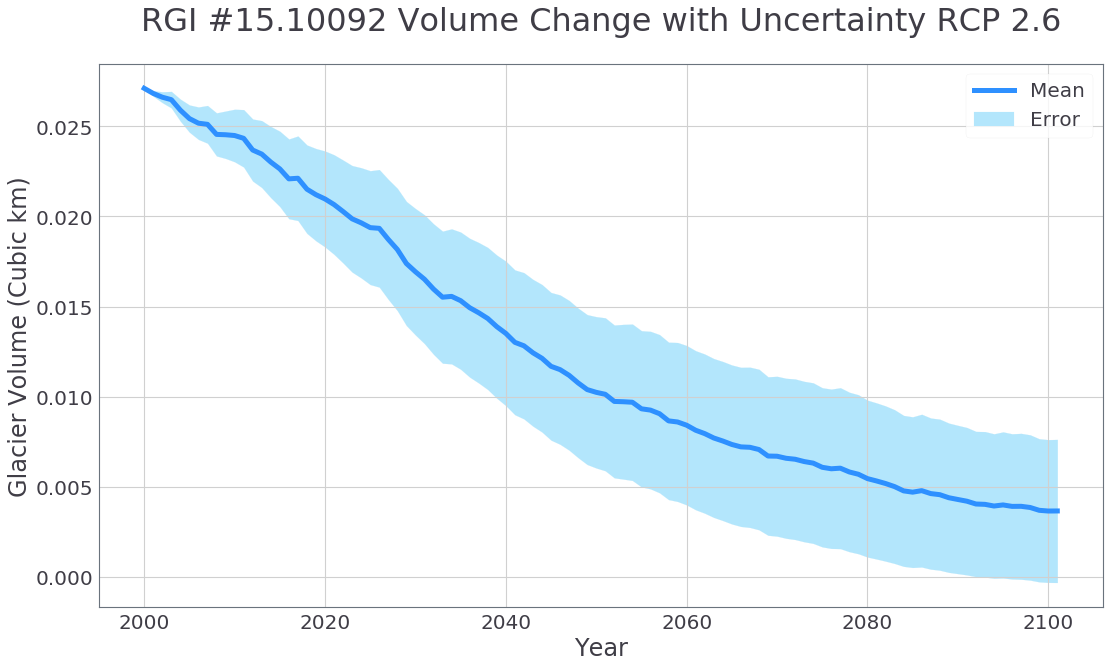

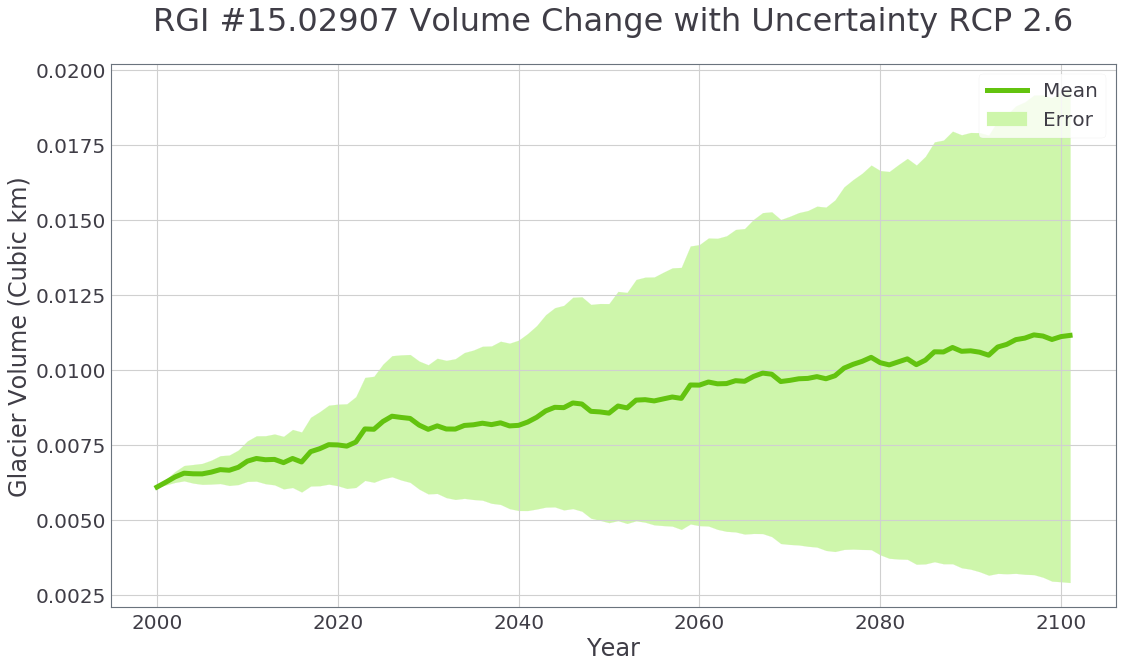

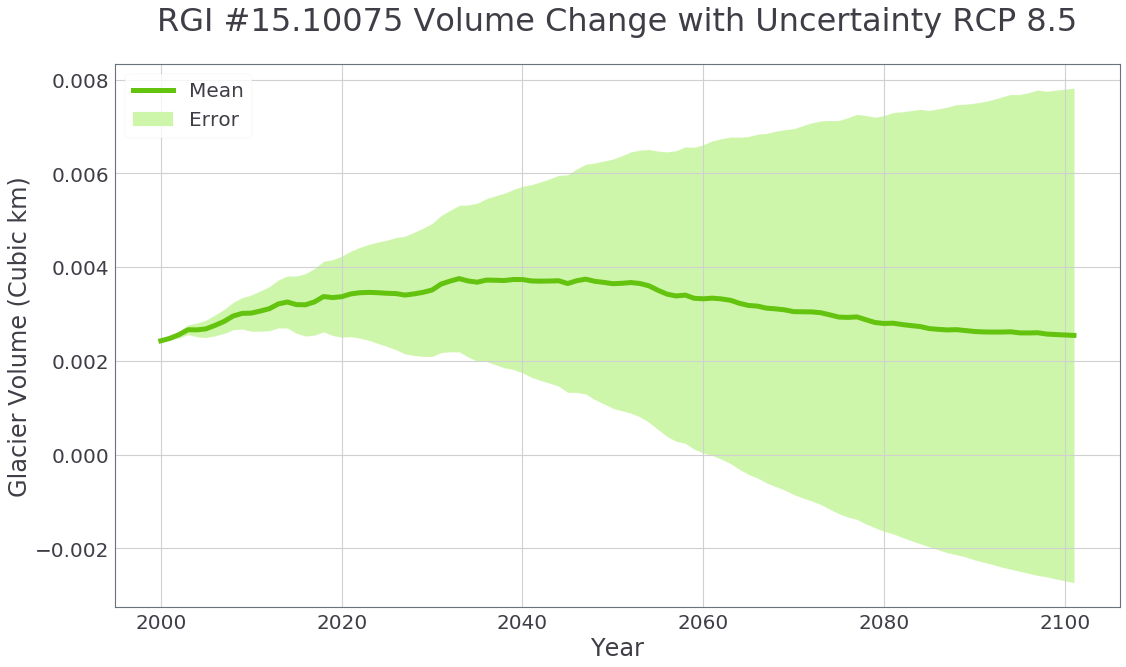

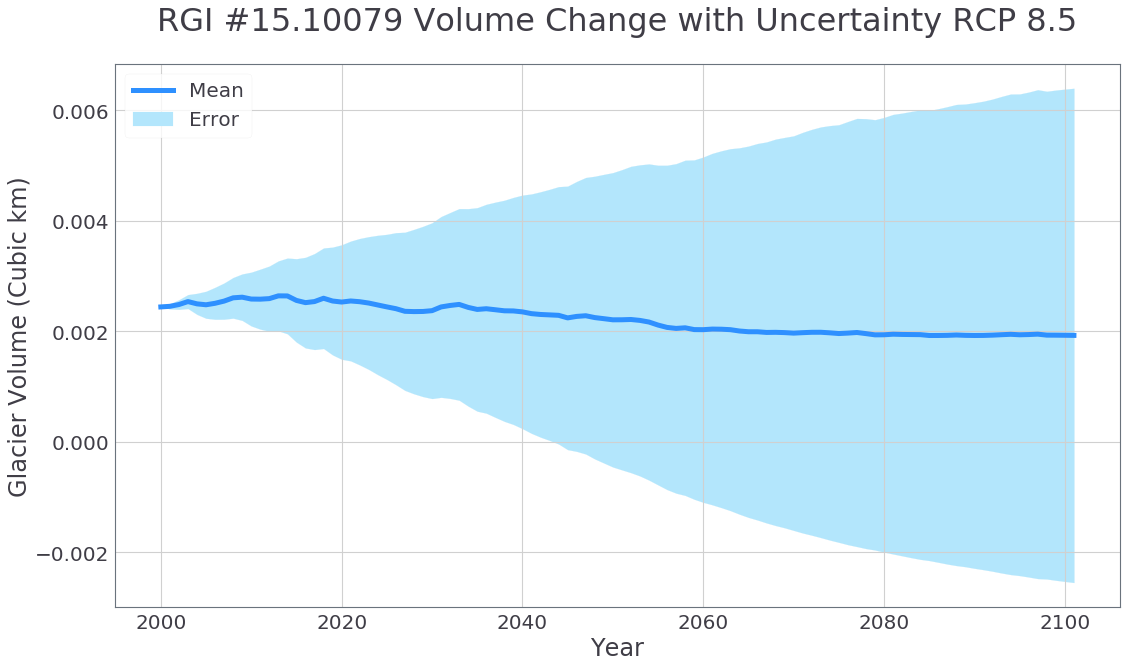

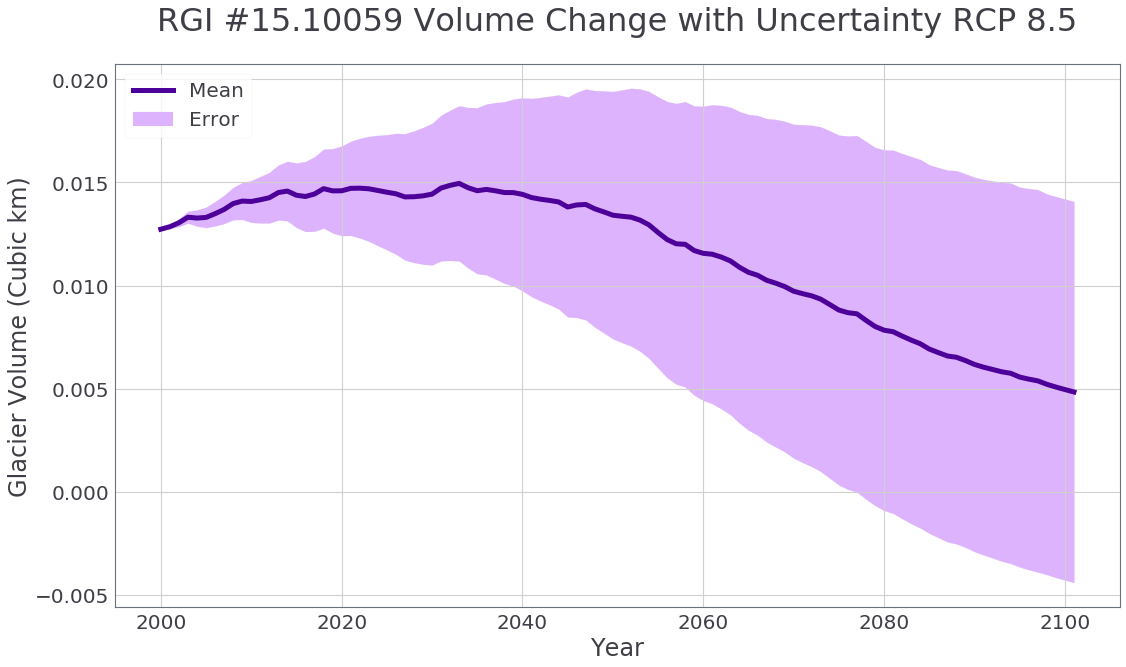

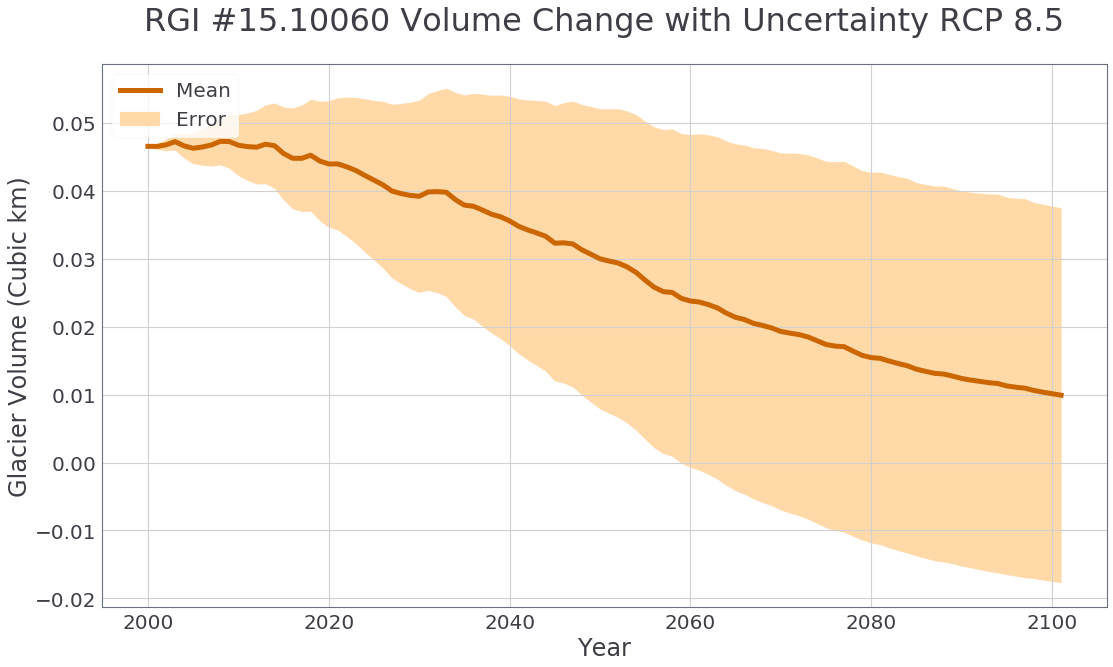

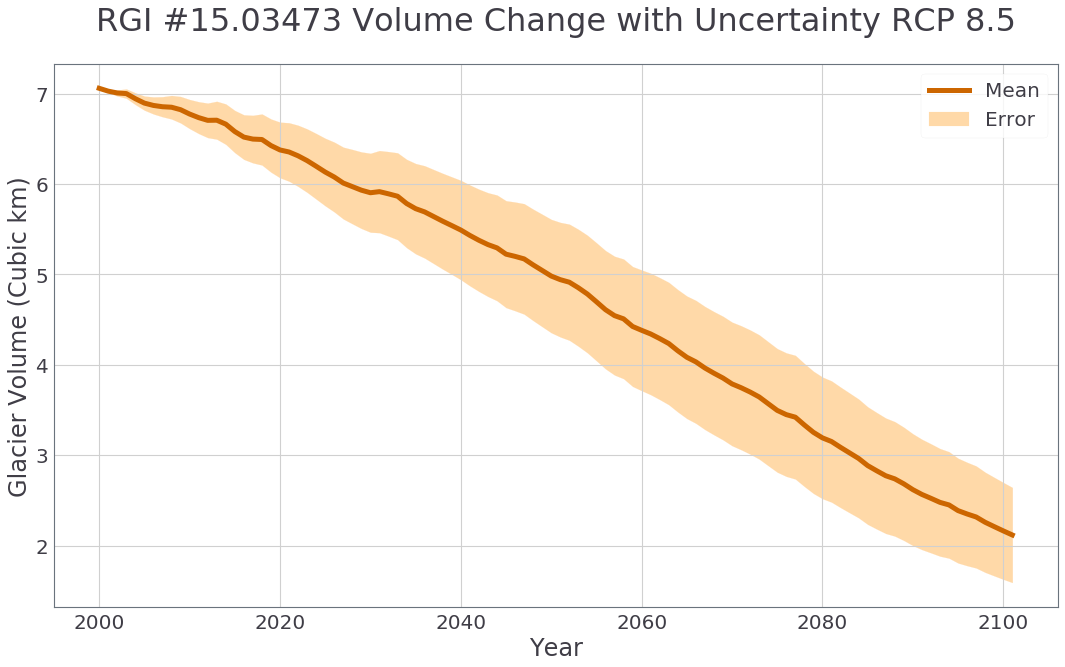

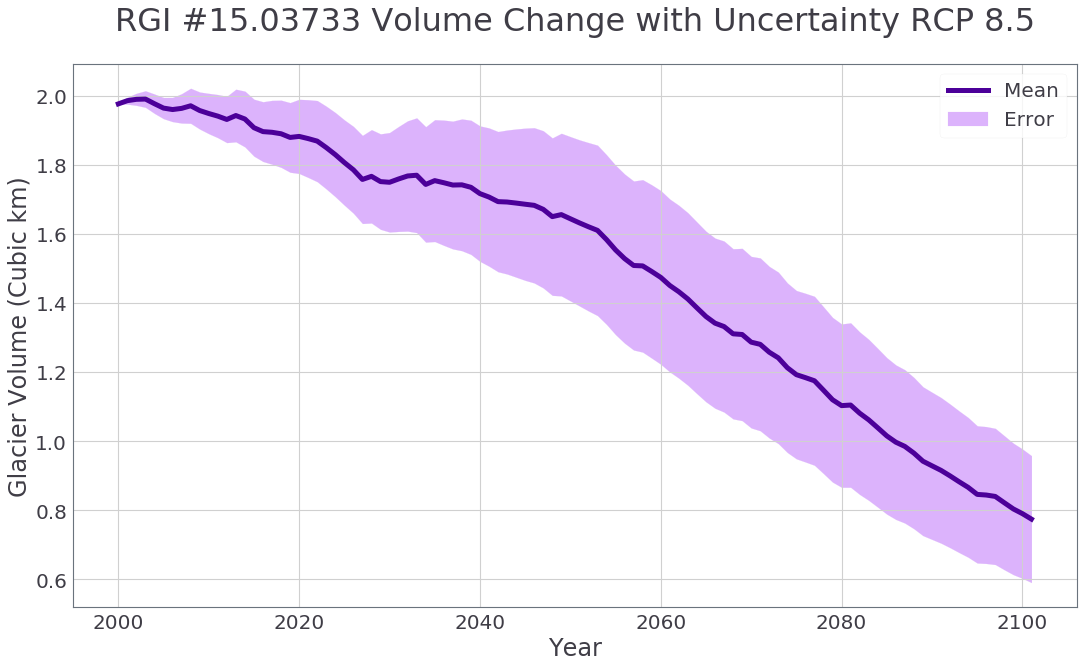

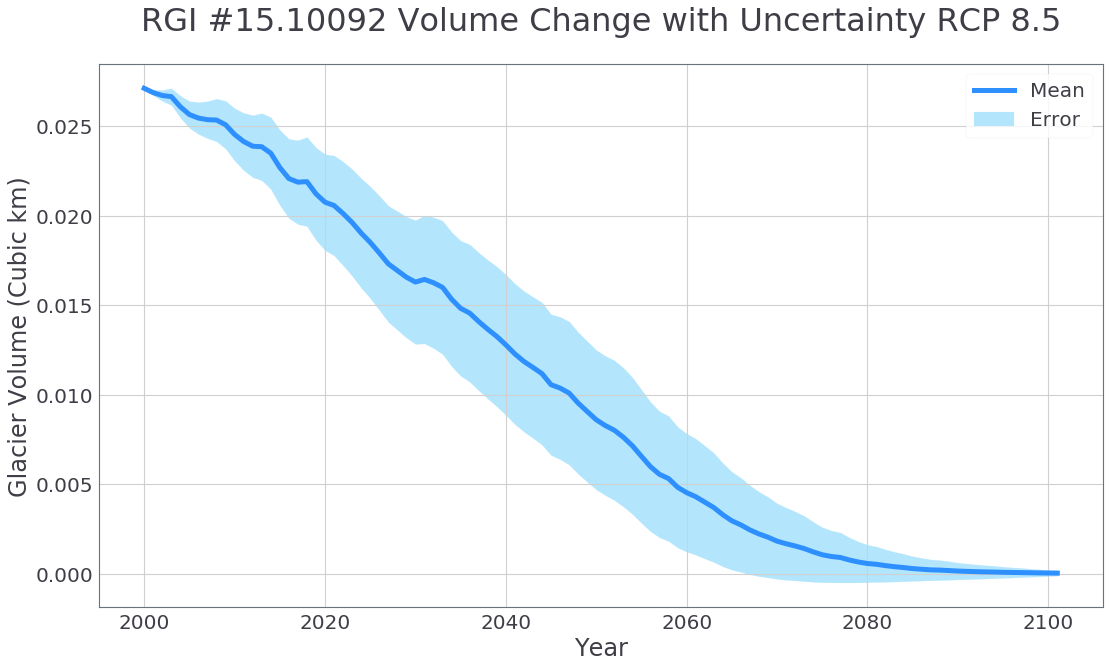

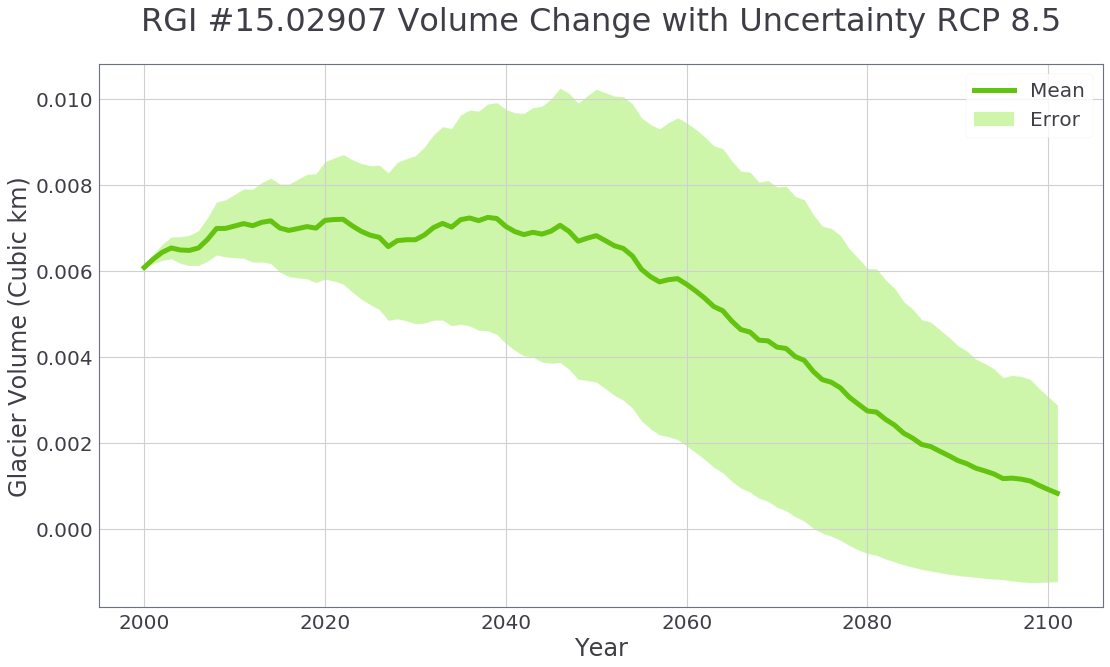

In [5]:
# variables
glacs = [{0:'10075', 1:'10079', 2:'10059', 3: '10060'}, {0:'03473', 1:'03733', 2:'10092', 3: '02907'}]
line_colors = ['#63c30f', '#2E90FF', '#4C0099', '#CC6600']
shade_colors = ['#CEF6AB', '#B3E6FC', '#DCB3FC', '#FFD9A8']
num_stds = 1
ds_names = ['27_10000', '29_4glaciers10000', '31_4glaciers10000', '30_4glaciers10000']
rcp = ['RCP 2.6', 'RCP 2.6', 'RCP 8.5', 'RCP 8.5']
rcp2 = ['26', '26', '85', '85']

for k in range(4):
    
    if k <= 1:
        
        index = [0, 1, 2, 3]
        
    elif k > 1:
        
        index = [2,3,0,1]
        
    j = 0    

    for idx in index:

        # get series of volume changes for different param sets
        series = []
        for run in results[ds_names[k]].sim.values:
            sr = results[ds_names[k]]['volume_glac_annual'].sel(glac_idx=idx, sim=run).to_series()
            series.append(sr)

        runs = pd.concat(series, axis=1)

        # find means and errors for plotting uncertainties
        mean = pd.concat(series, axis=1).mean(axis=1)
        std = pd.concat(series, axis=1).std(axis=1)

        # do the plotting
        fig = plt.figure()

        if k % 2 == 0:
            plt.plot(mean, color=line_colors[j], linewidth=5, label='Mean')
            plt.fill_between(std.index, mean-(num_stds*std), mean+(num_stds*std), label='Error', color=shade_colors[j])
            plt.legend(loc='upper left', fontsize=20)
        else:
            plt.plot(mean, color=line_colors[3-j], linewidth=5, label='Mean')
            plt.fill_between(std.index, mean-(num_stds*std), mean+(num_stds*std), label='Error', color=shade_colors[3-j])
            plt.legend(loc='best', fontsize=20)
            
        # niceties
        plt.title('RGI #15.' + glacs[k%2][j] + ' Volume Change with Uncertainty ' + rcp[k], fontsize = 32, y=1.05)
        plt.ylabel('Glacier Volume (Cubic km)', fontsize =24)
        plt.xlabel('Year', fontsize = 24)

        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)

        plt.show()
        #print('../uncertainty_plots_single_glacier/' + glacs[k%2][j] + '_rcp'+ rcp2[k] + '.png')

        #fig.savefig('../uncertainty_plots_single_glacier/' + glacs[k%2][j] + '_rcp'+ rcp2[k] + '.png')
        
        j += 1

## Comparing Uncertainty

#### Plotting single glaciers under different RCP on same plot.

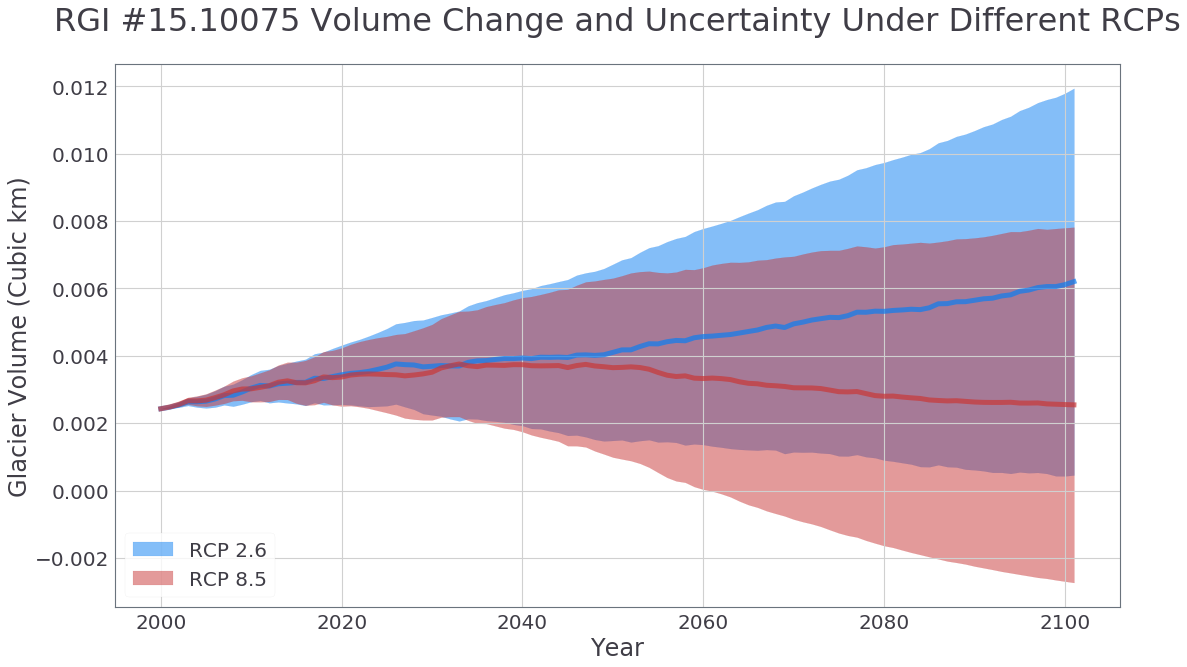

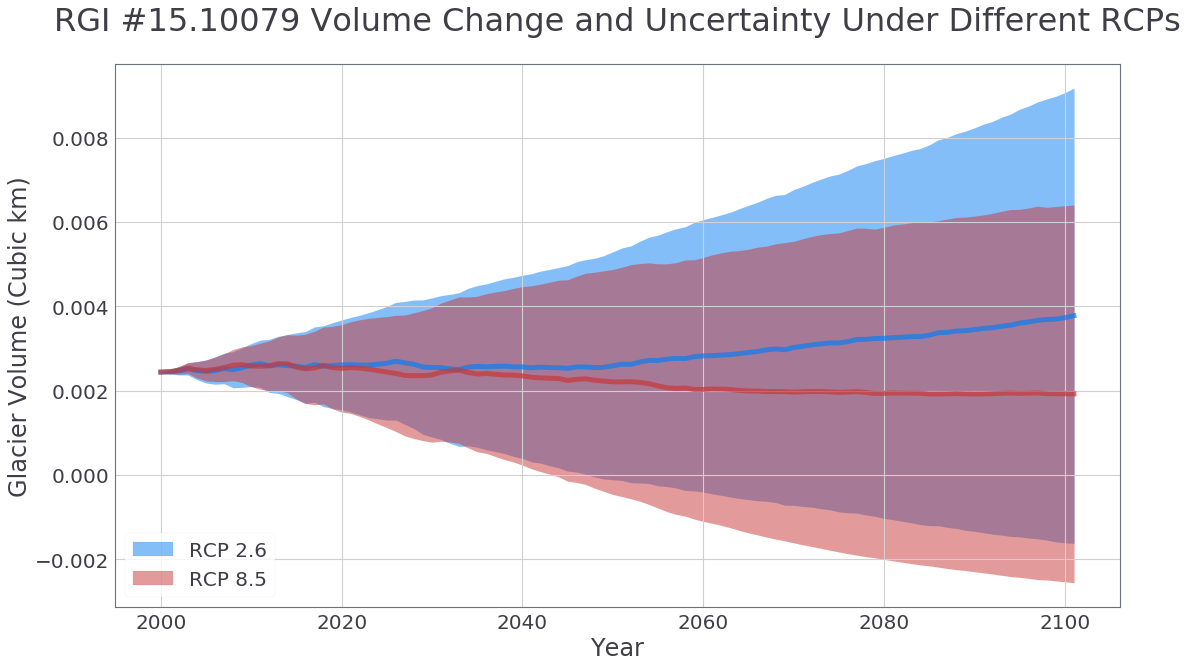

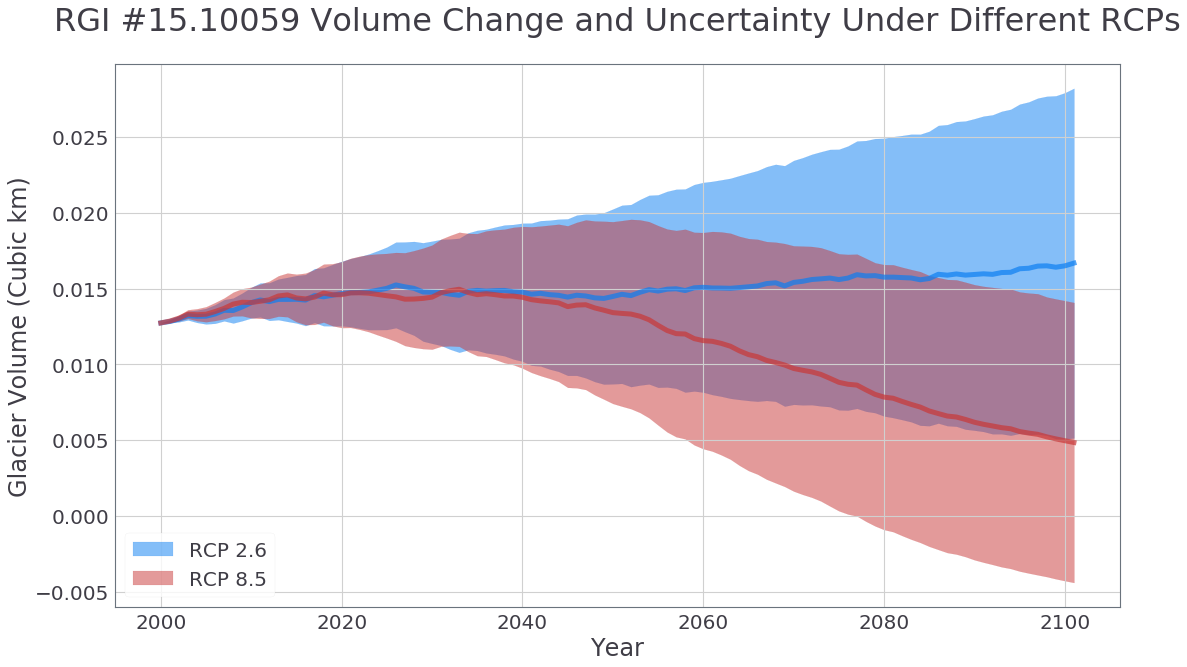

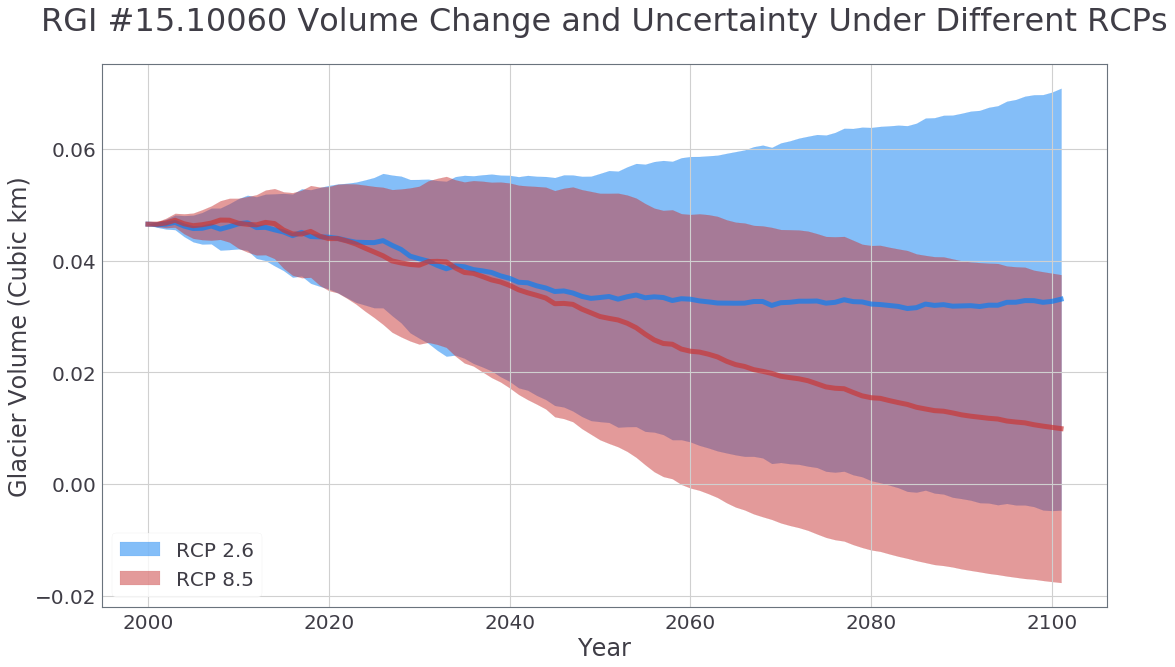

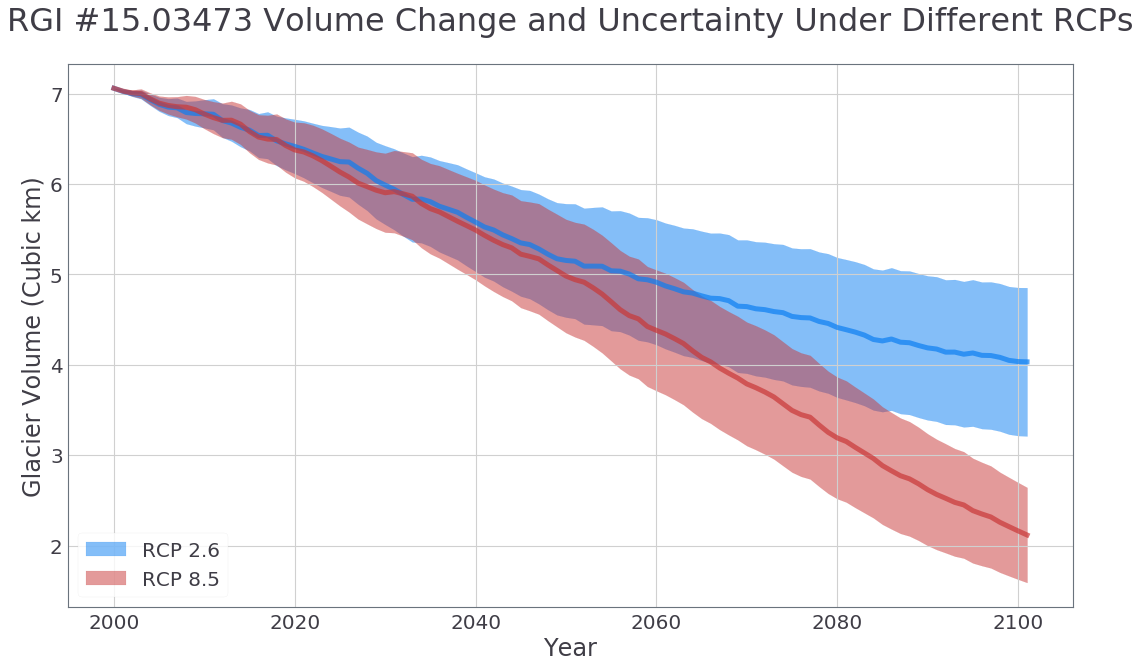

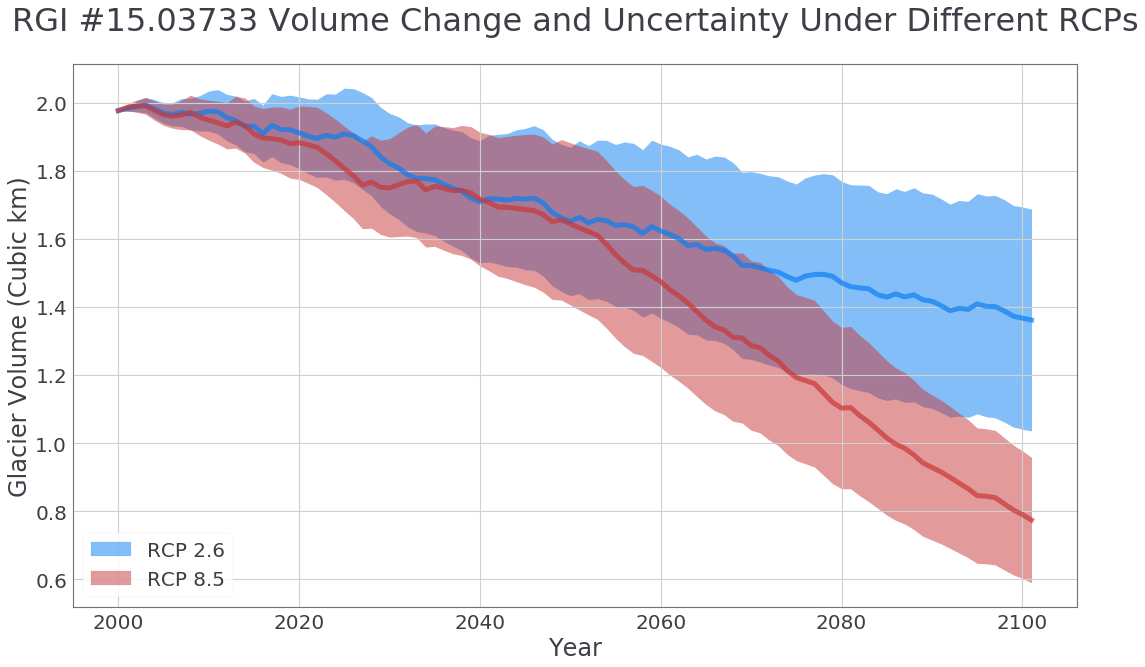

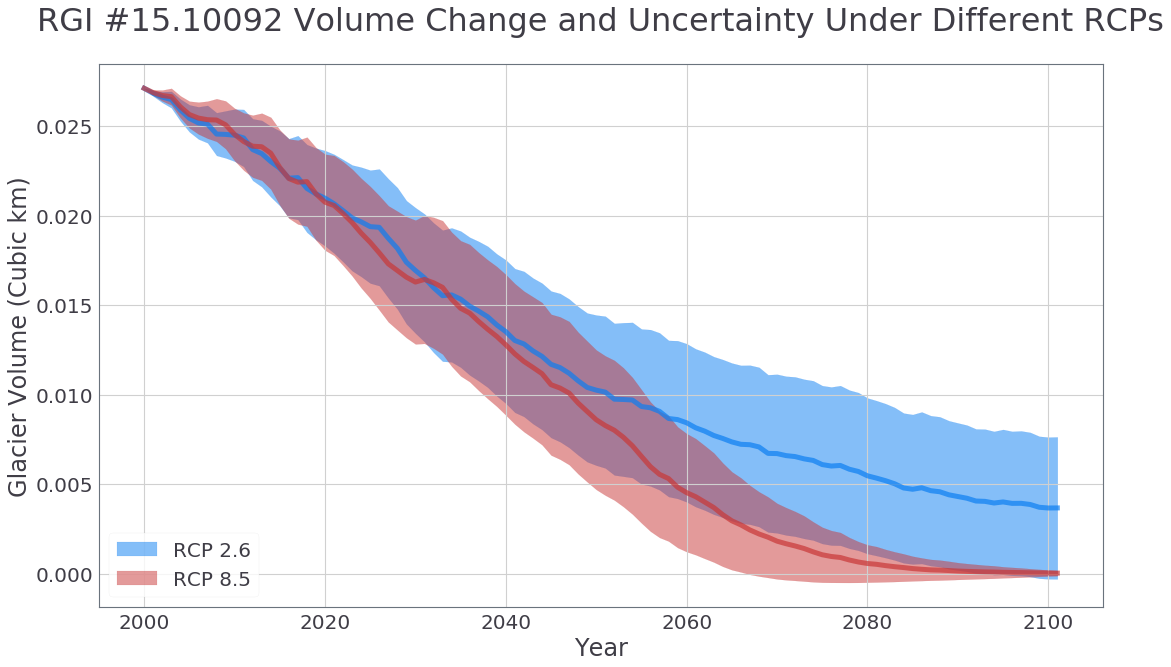

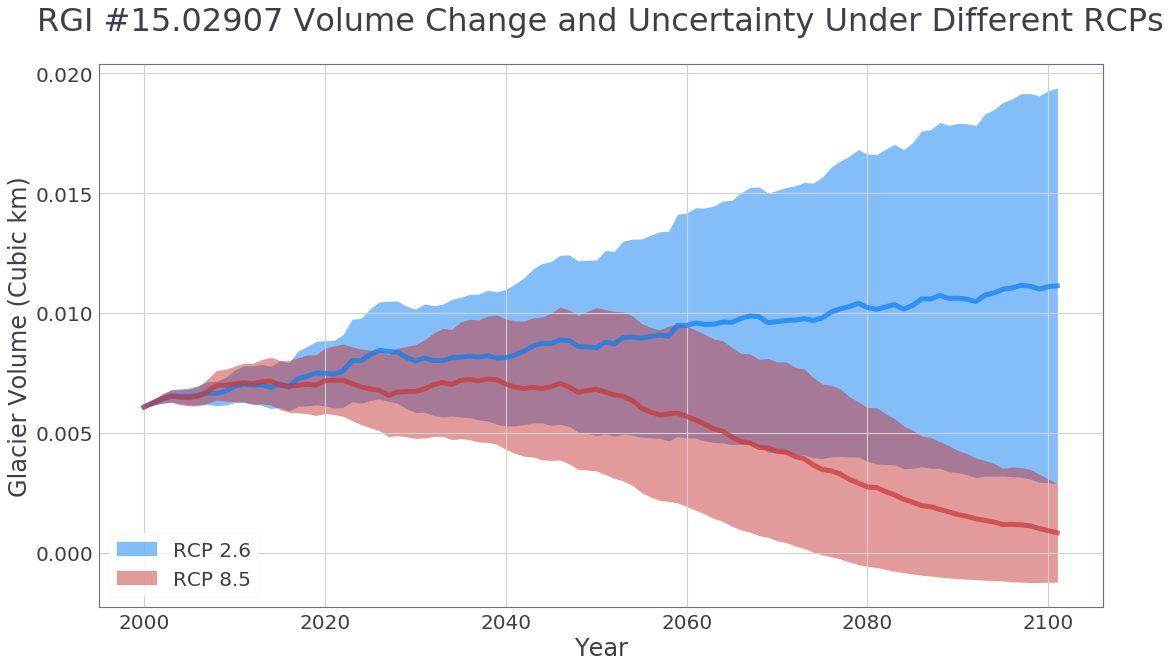

In [6]:
# all the different labels and variables
glacs = [{0:'10075', 1:'10079', 2:'10059', 3: '10060'}, {0:'03473', 1:'03733', 2:'10092', 3: '02907'}]
line_colors = ['#C93737', '#0B7EF2', '#63c30f', '#2E90FF', '#4C0099', '#CC6600']
shade_colors = ['#C93737', '#0B7EF2', '#CEF6AB', '#B3E6FC', '#DCB3FC', '#FFD9A8']
num_stds = 1
ds_names = ['27_10000', '29_4glaciers10000', '31_4glaciers10000', '30_4glaciers10000']
rcp = ['RCP 2.6', 'RCP 8.5', 'RCP 8.5', 'RCP 8.5']
rcp2 = ['26', '26', '85', '85']

# level of transparency for plots
alpha = 0.7
s_alpha = 0.5

for k in range(2):
    
    for j in range(4):
        
        # do the plotting
        fig = plt.figure()
        
        for l in [0,2]:
    
            if l < 1:

                index = [0, 1, 2, 3]

            elif l >= 1:

                index = [2,3,0,1]
           

            # get series of volume changes for different param sets
            series = []
            for run in results[ds_names[k+l]].sim.values:
                sr = results[ds_names[k+l]]['volume_glac_annual'].sel(glac_idx=index[j], sim=run).to_series()
                series.append(sr)

            runs = pd.concat(series, axis=1)

            # find means and errors for plotting uncertainties
            mean = pd.concat(series, axis=1).mean(axis=1)
            std = pd.concat(series, axis=1).std(axis=1)

            if l < 1:
                plt.plot(mean, color=line_colors[1], linewidth=5, alpha=alpha)
                plt.fill_between(std.index, mean-(num_stds*std), mean+(num_stds*std), label=rcp[l], color=shade_colors[1], alpha=s_alpha)

            else:
                plt.plot(mean, color=line_colors[0], linewidth=5, alpha=alpha)
                plt.fill_between(std.index, mean-(num_stds*std), mean+(num_stds*std), label=rcp[l], color=shade_colors[0], alpha=s_alpha)
                

        # niceties
        plt.title('RGI #15.' + glacs[k%2][j] + ' Volume Change and Uncertainty Under Different RCPs', fontsize = 32, y=1.05)
        plt.ylabel('Glacier Volume (Cubic km)', fontsize =24)
        plt.xlabel('Year', fontsize = 24)

        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        
        plt.legend(loc='lower left', fontsize=20)

        plt.show()
        
        #print('../uncertainty_plots_single_glacier/' + glacs[k%2][j] + '_comparison' + '.png')

        #fig.savefig('../uncertainty_plots_single_glacier/' + glacs[k%2][j] + '_comparison' + '.png')
